## 1️⃣ Importing Libraries

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

## 2️⃣ Load the Dataset

In [234]:
df_regression = pd.read_csv('Telco-Customer-Churn.csv')
df_classification = pd.read_csv('Telco-Customer-Churn.csv')
df_cluster = pd.read_csv('Telco-Customer-Churn.csv')
df_regression.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## 3️⃣ Data Cleaning & Preprocessing
- Check missing values and data types
- Encode categorical variables
- Scale numeric features

In [270]:
# change total charges column from object to numeric
df_regression["TotalCharges"] = pd.to_numeric(df_regression["TotalCharges"], errors='coerce')
df_regression

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994194,0
1,1,-0.439916,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173740,0
2,1,-0.439916,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959649,1
3,1,-0.439916,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195248,0
4,0,-0.439916,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.439916,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.129180,0
7039,0,-0.439916,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.241056,0
7040,0,-0.439916,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854514,0
7041,1,2.273159,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872095,1


In [236]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [237]:
df_regression.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [283]:
#drop rows with null values
df_regression = df_regression.dropna()
# check for duplicates
df_regression.duplicated().sum()
df_regression.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 4️⃣ Exploratory Data Analysis (EDA)
- Summary statistics
- Visualize churn distribution
- Correlation heatmap
- Histograms and boxplots

In [238]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [277]:
#handle null rows in Total charges

df_regression.dropna()
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [239]:
df_regression.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


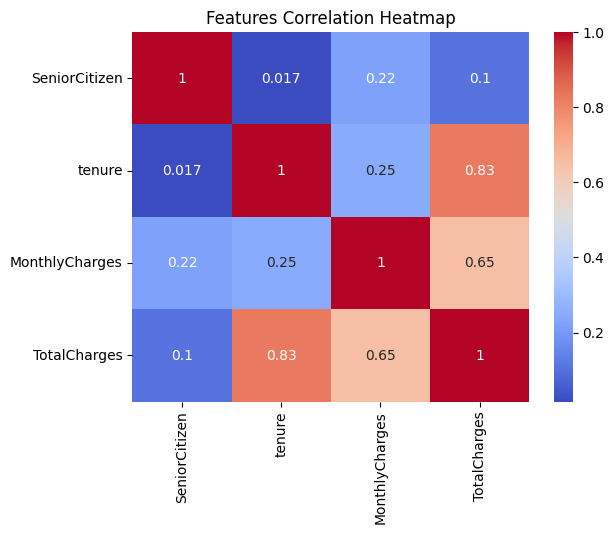

In [240]:
#correlation heatmap
sns.heatmap(df_regression.corr(numeric_only = True), annot = True, cmap = "coolwarm")
plt.title("Features Correlation Heatmap")
plt.show()

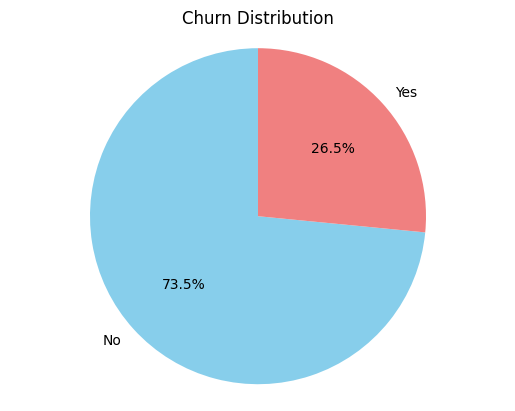

In [241]:
#visualisation of distribution of churn 
churn_counts = df_regression['Churn'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution') 
plt.axis('equal')
plt.show() 

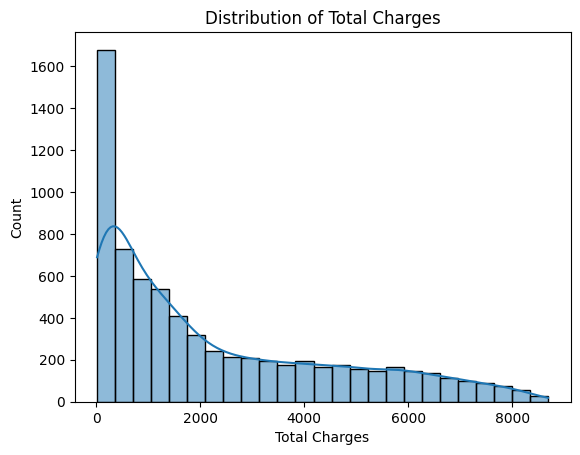

In [242]:
#distribution of totalcharges
sns.histplot(df_regression['TotalCharges'], kde=True)
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.show()

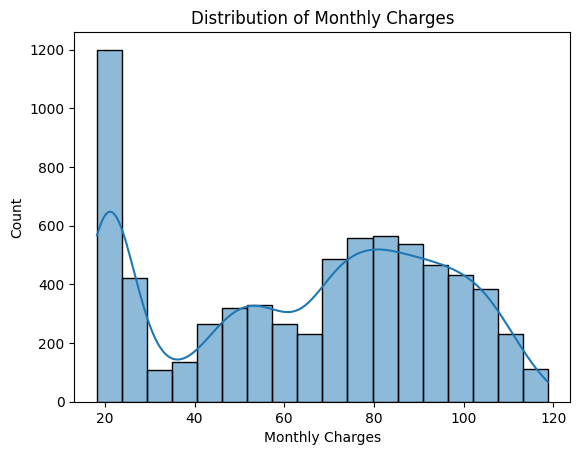

In [243]:
#distribution of totalcharges
sns.histplot(df_regression['MonthlyCharges'], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.show()

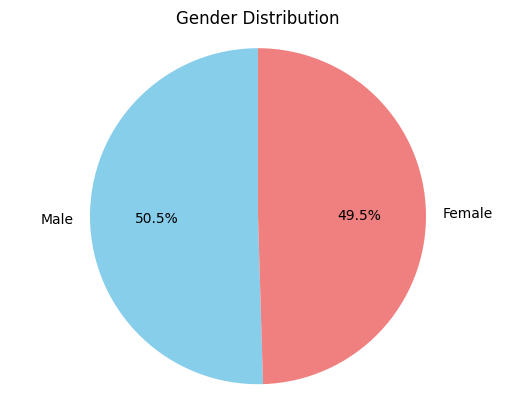

In [244]:
#Pie chart of gender distribution
gender_counts = df_regression['gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution') 
plt.axis('equal')
plt.show() 

In [245]:

num_feats = df_regression.select_dtypes(include = [np.number]).columns
num_feats

cat_feats= df_regression.select_dtypes(exclude=[np.number]).columns


In [246]:
#scale the numerical columns
scaler = StandardScaler()
df_regression[num_feats]= scaler.fit_transform(df_regression[num_feats])
df_regression.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03,7.032000e+03
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17,8.159318e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-9.990692e-01
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-8.302488e-01
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-3.908151e-01
75%,-4.399165e-01,9.214551e-01,8.338335e-01,6.668271e-01
max,2.273159e+00,1.613701e+00,1.794352e+00,2.824261e+00


In [247]:
df_regression.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,-0.439916,Yes,No,-1.277445,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994194,No
1,5575-GNVDE,Male,-0.439916,No,No,0.066327,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173740,No
2,3668-QPYBK,Male,-0.439916,No,No,-1.236724,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.959649,Yes
3,7795-CFOCW,Male,-0.439916,No,No,0.514251,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195248,No
4,9237-HQITU,Female,-0.439916,No,No,-1.236724,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.940457,Yes


In [ ]:
# drop customer id column

# df_regression.head()
# df_regression = df_regression.drop('customerID',)
# cat_feats = cat_feats.drop('customerID',)
cat_feats
# df_regression.head()



Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
#encoding categorical columns

for col in cat_feats:
    encoder = LabelEncoder()    
    df_regression[col] = encoder.fit_transform(df_regression[col])
df_regression.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994194,0
1,1,-0.439916,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173740,0
2,1,-0.439916,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959649,1
3,1,-0.439916,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195248,0
4,0,-0.439916,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940457,1


## 5️⃣ Regression Task: Predict Monthly Charges
- Target: `MonthlyCharges`
- Evaluation: MAE, RMSE, R²

In [256]:
df_regression.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994194,0
1,1,-0.439916,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173740,0
2,1,-0.439916,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959649,1
3,1,-0.439916,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195248,0
4,0,-0.439916,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940457,1


In [284]:
#spliting data into independent and target variable
X = df_regression.drop("MonthlyCharges", axis = 1) #would only contain independent features(use for predicting the target)
y = df_regression["MonthlyCharges"] #target variable

print(X.shape)
X.info()

(7032, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   float64
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   in

In [285]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


In [286]:
#training model
model = LinearRegression()

#fit the model - training main
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [287]:
#make predictions on just the test independent variables

y_pred = model.predict(X_test)
y_pred 


array([-1.25862786, -0.6983383 ,  0.81797571, ..., -0.15912883,
        0.94720435, -1.47175222], shape=(1407,))

In [288]:
# evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE for RandomForestRegressor Model: {mae}")

r2_ = r2_score(y_test, y_pred)
print(f"R-squared for RFR: {r2_}")

MAE for RandomForestRegressor Model: 0.35372496855980606
R-squared for RFR: 0.8105235496048196
